In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import jarque_bera
import scipy.stats as stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('regression_data.csv')
df.head()

,x,y,z,cat,y2,x2,d1,zx
0,22,10,19,a,100,484,0,418
1,1,7,70,a,49,1,0,70
2,21,22,4,a,484,441,0,84
3,23,7,23,b,49,529,0,529
4,10,12,56,b,144,100,0,560


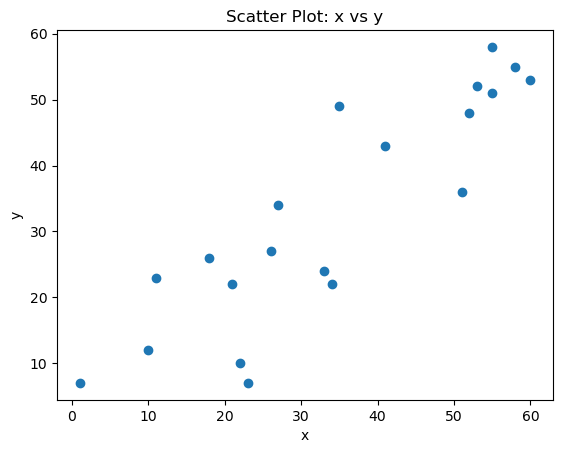

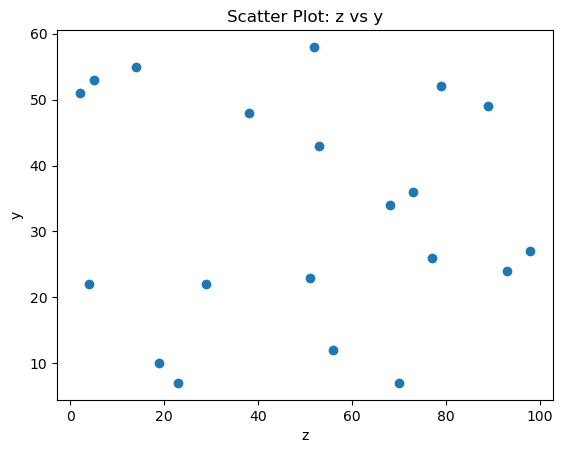

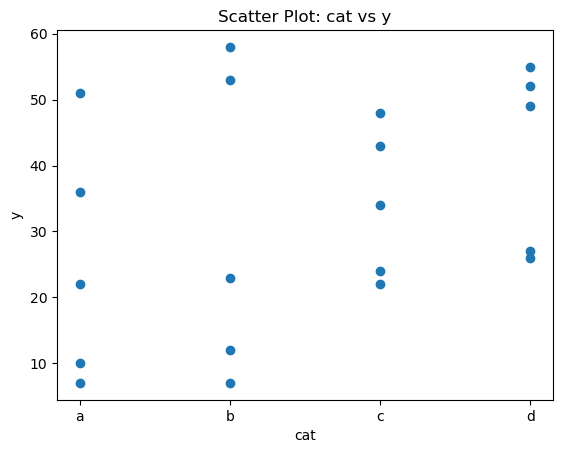

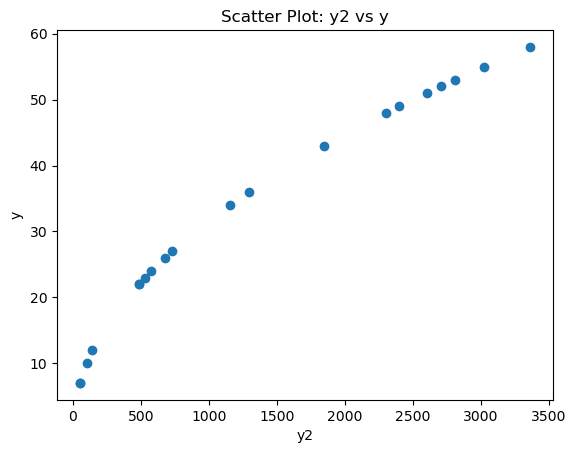

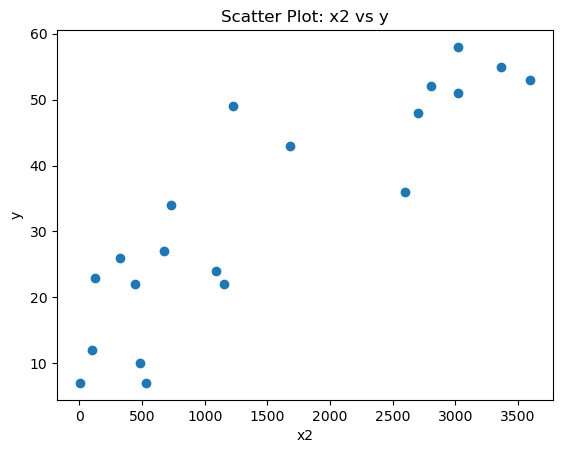

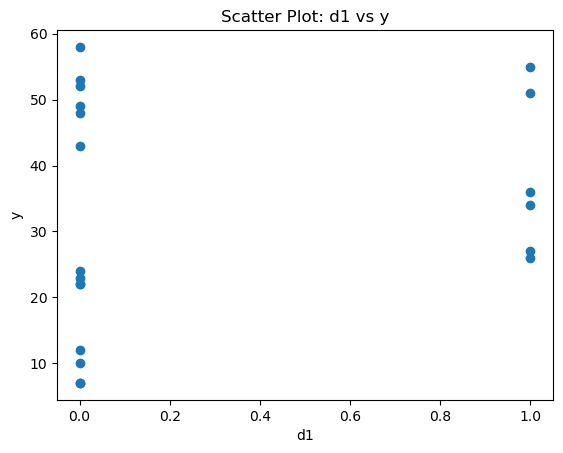

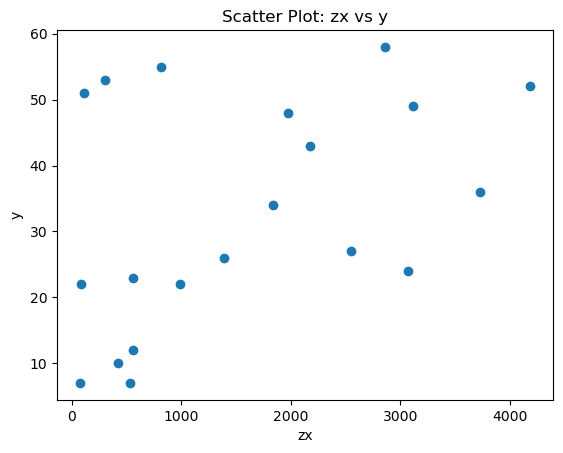

In [4]:
#Create scatter plots of all x variables against y, w/o trendline
def create_scatter_plots(dataframe, y_variable):
    x_variables = dataframe.columns.tolist()
    for x_variable in x_variables:
        if x_variable != y_variable:
            plt.scatter(dataframe[x_variable], dataframe[y_variable])
            plt.xlabel(x_variable)
            plt.ylabel(y_variable)
            plt.title(f"Scatter Plot: {x_variable} vs {y_variable}")
            plt.show()  
            
            
create_scatter_plots(df,'y')

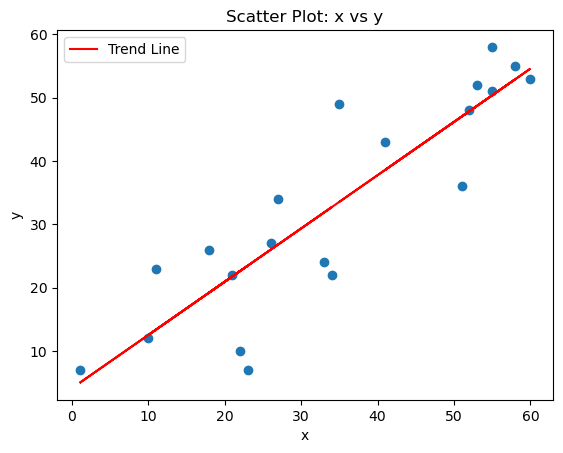

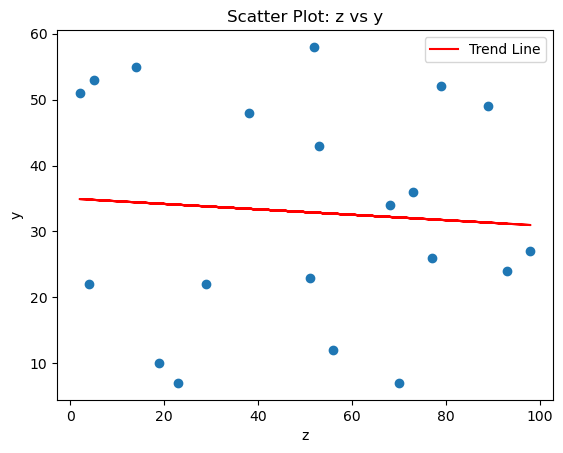

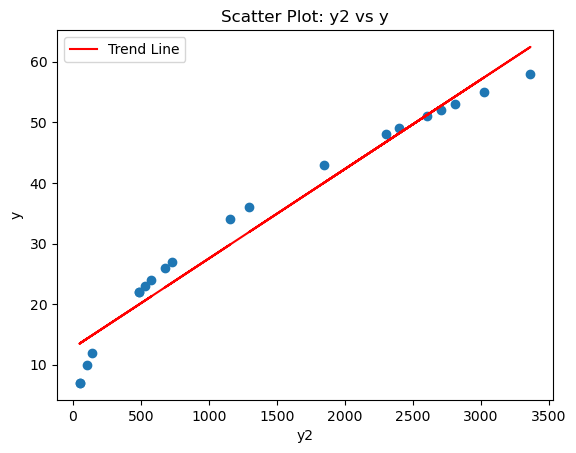

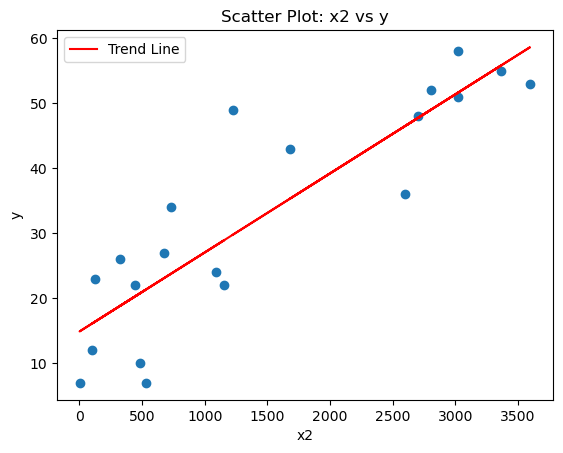

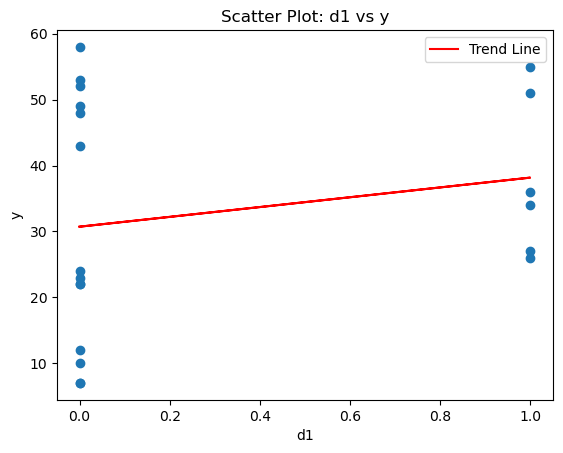

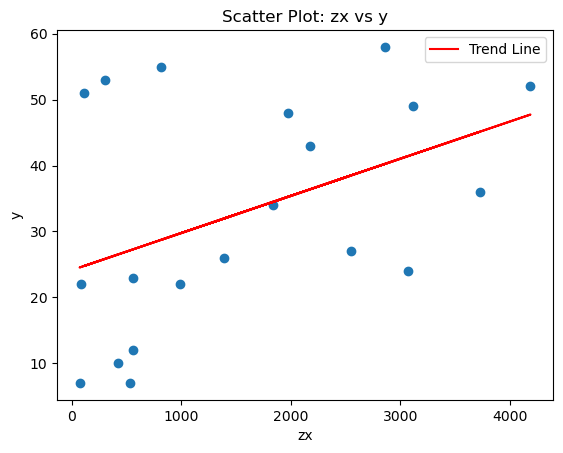

In [189]:
#Create scatter plots of all x variables against y, w/ trendline
#Categorical variable breaks this, so it is was removed. New code checks if categorical and removes any variables that will cause a problem
def create_scatter_plots(dataframe, y_variable):
    #x_variables.remove('cat')
    x_variables = dataframe.columns.tolist()
    categorical_variables = []

    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            categorical_variables.append(column)

    x_variables = [x for x in x_variables if x not in categorical_variables]


    for x_variable in x_variables:
        if x_variable != y_variable:
            x = dataframe[x_variable]
            y = dataframe[y_variable]

            slope, intercept = np.polyfit(x, y, 1)
            trend_line = slope * x + intercept

            plt.scatter(x, y)
            plt.plot(x, trend_line, color='red', label='Trend Line')
            plt.xlabel(x_variable)
            plt.ylabel(y_variable)
            plt.title(f"Scatter Plot: {x_variable} vs {y_variable}")
            plt.legend()
            plt.show()
            
create_scatter_plots(df,'y')

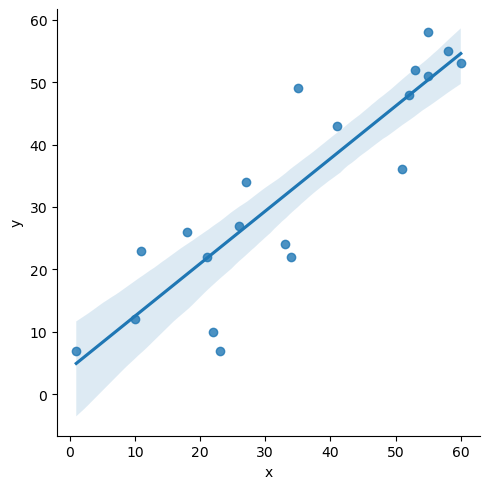

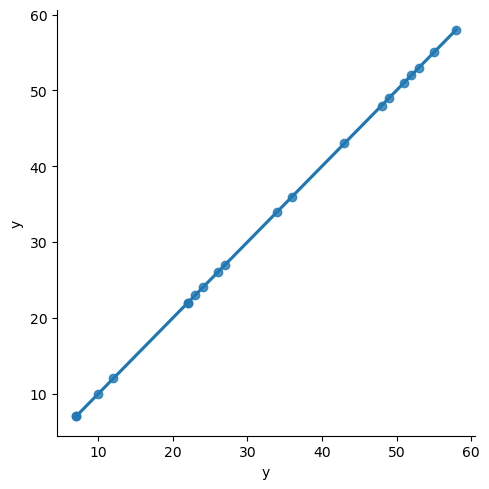

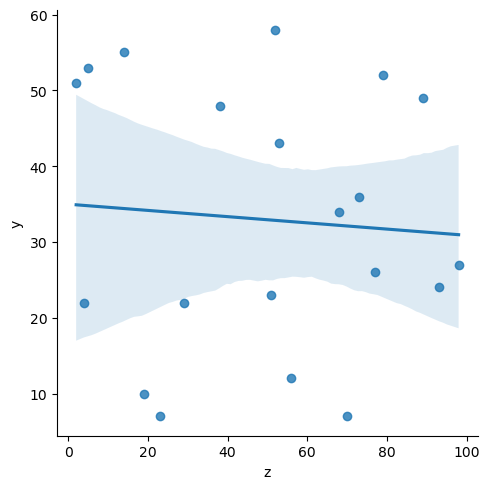

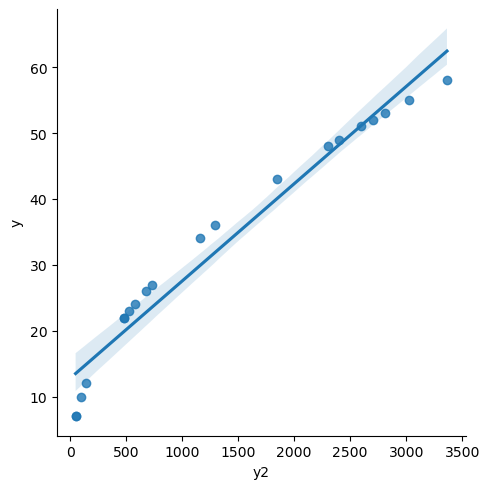

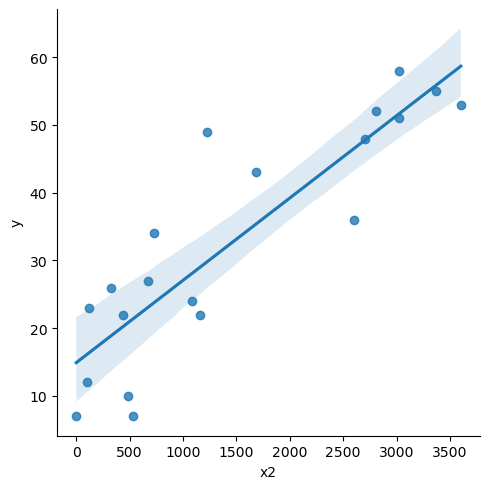

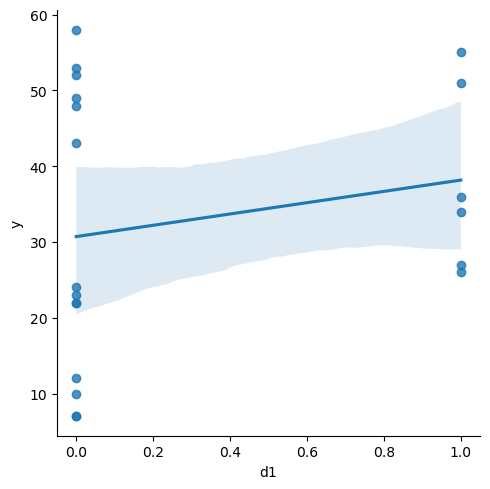

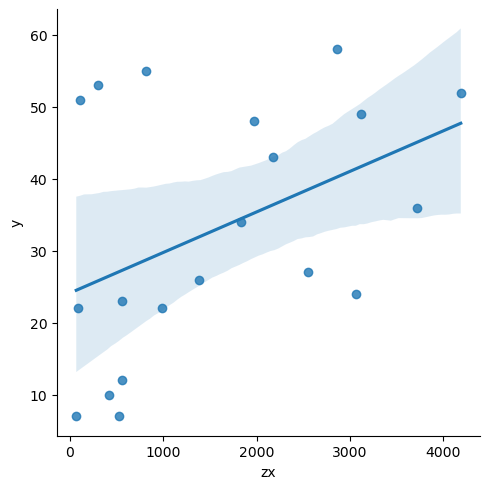

In [190]:
def create_scatter_plots_with_seaborn(dataframe, y_variable):
    #x_variables.remove('cat')
    x_variables = dataframe.columns.tolist()
    categorical_variables = []

    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            categorical_variables.append(column)

    x_variables = [x for x in x_variables if x not in categorical_variables]

    for x in x_variables:
        sns.lmplot(x=x,y='y', fit_reg=True, data=df)

create_scatter_plots_with_seaborn(df,y)

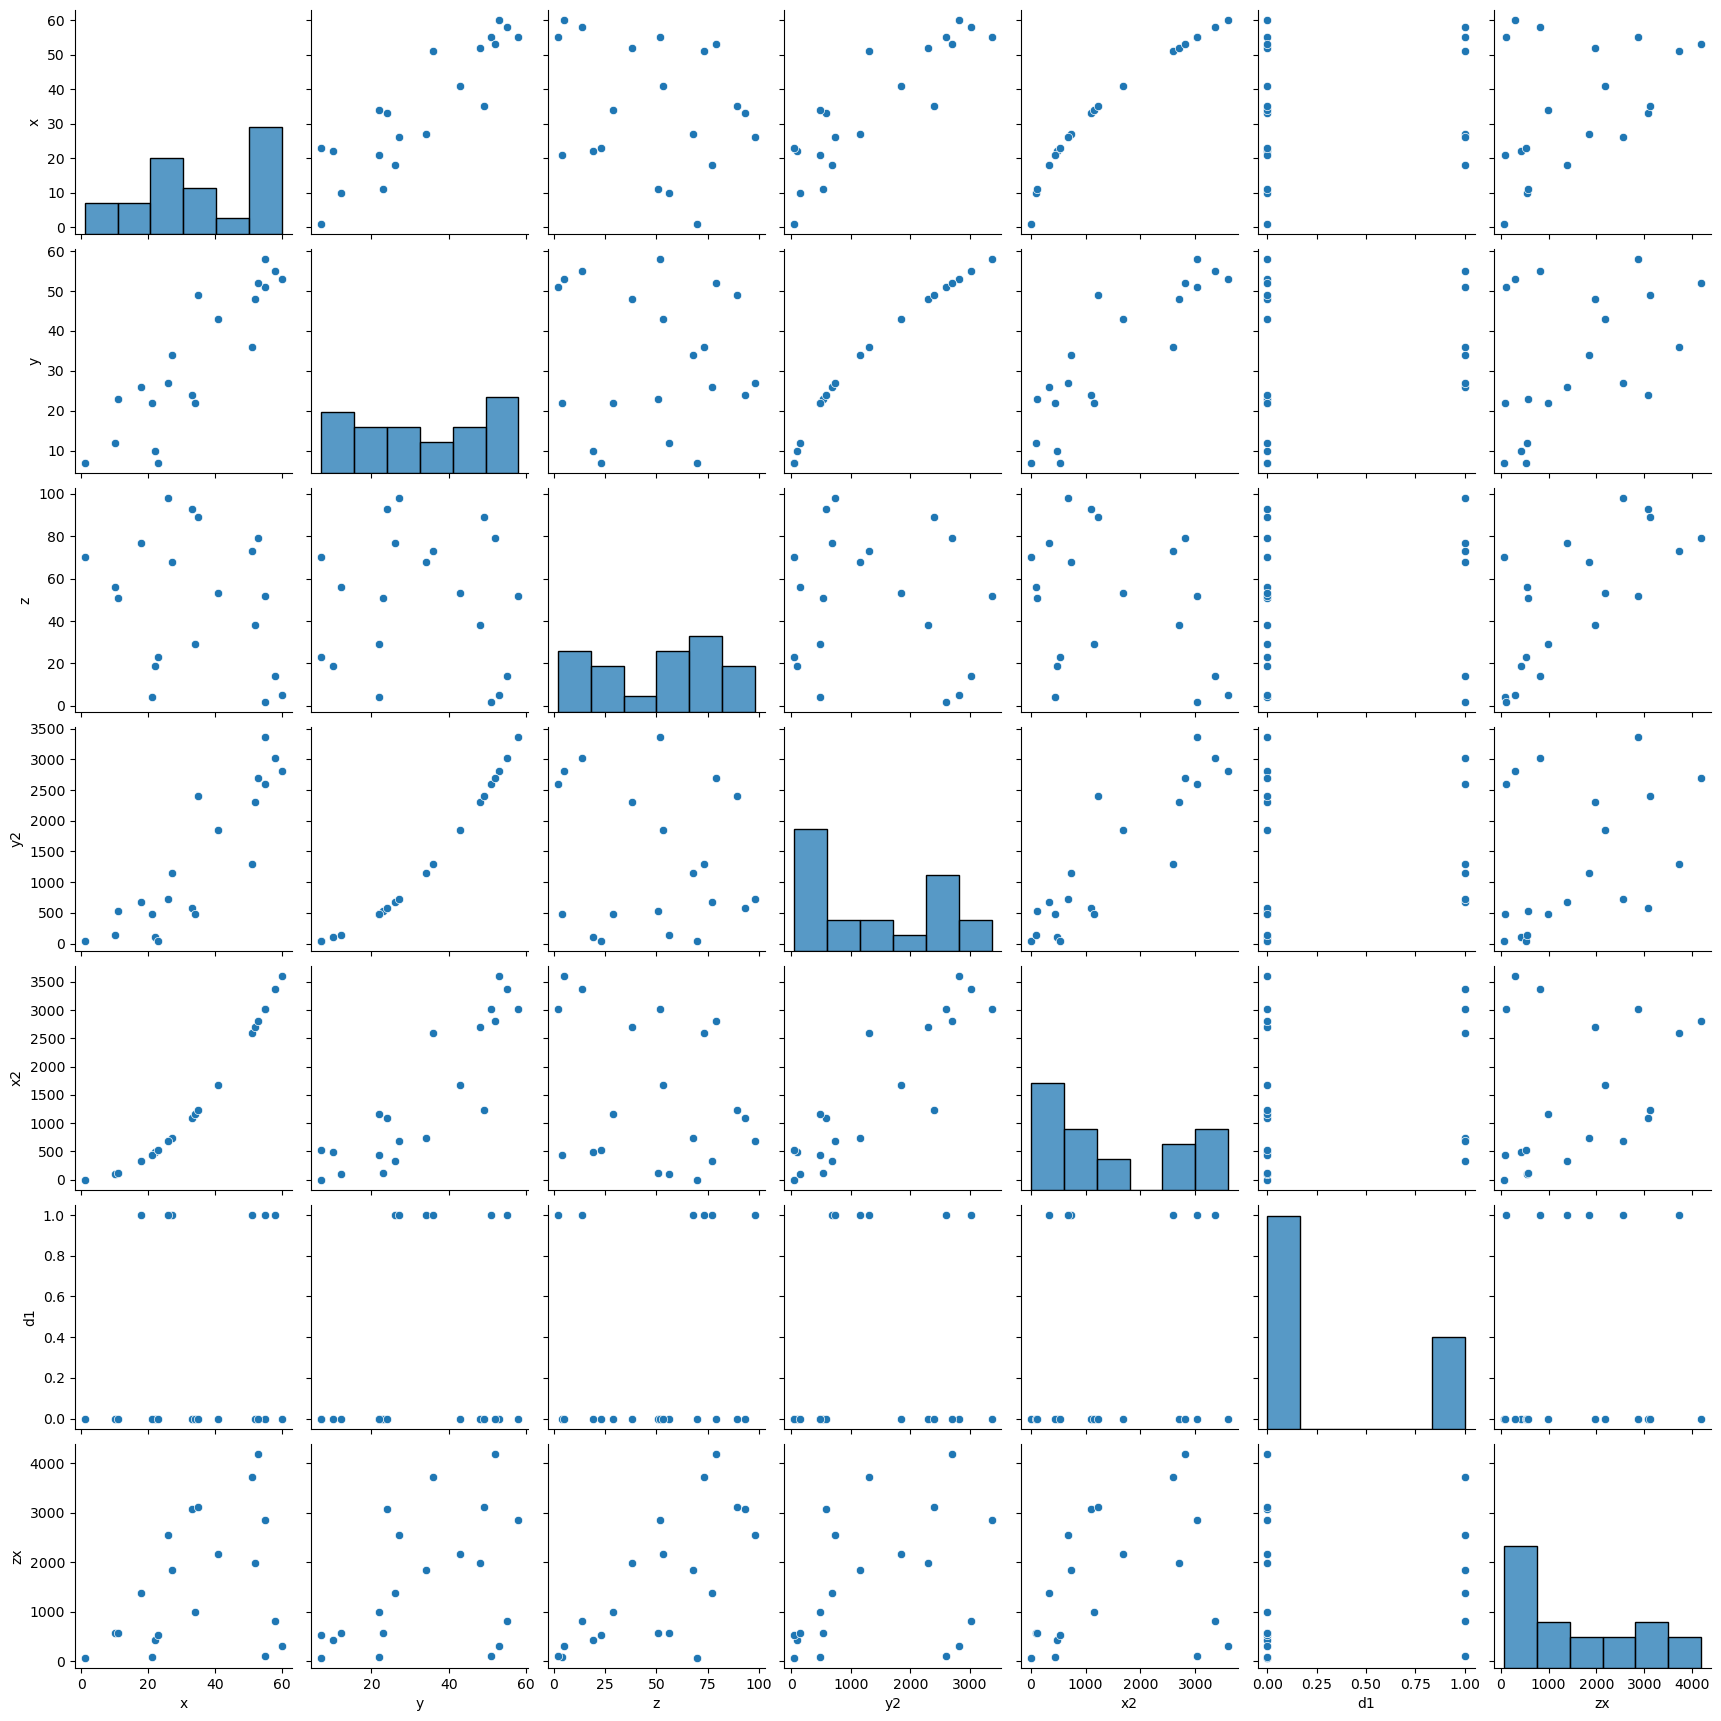

In [191]:
#Plot everything against everything with Seaborn
sns.pairplot(df)

In [5]:
#Regression
model = sm.OLS.from_formula('y ~ x + z', df) #Describes the model
results = model.fit() #Runs the regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     34.20
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.10e-06
Time:                        18:01:48   Log-Likelihood:                -68.613
No. Observations:                  20   AIC:                             143.2
Df Residuals:                      17   BIC:                             146.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7551      5.648     -0.311      0.760     -13.671      10.161
x              0.8817      0.107      8.241      0.000       0.656       1.107
z              0.0899      0.062      1.459      0.163      -0.040       0.220
==============================================================================
Omnibus:                        1.715   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                1.446
Skew:                          -0.537   Prob(JB):                        0.485
Kurtosis:                       2.237   Cond. No.                         204.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#Alternative speciciation
X = df[['x','z','x2','y2']]
y = df['y'] 
X = sm.add_constant(X)
print(X.head())

model = sm.OLS(y,X)
results = model.fit()
results.summary()

   const   x   z   x2   y2
0    1.0  22  19  484  100
1    1.0   1  70    1   49
2    1.0  21   4  441  484
3    1.0  23  23  529   49
4    1.0  10  56  100  144


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     143.3
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           9.29e-12
Time:                        18:17:13   Log-Likelihood:                -48.061
No. Observations:                  20   AIC:                             106.1
Df Residuals:                      15   BIC:                             111.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2999      2.767      1.915      0.075      -0.599      11.198
x              0.4169      0.174      2.393      0.030       0.046       0.788
z              0.0339      0.025      1.341      0.200      -0.020       0.088
x2            -0.0054      0.003     -1.855      0.083      -0.012       0.001
y2             0.0144      0.001      9.671      0.000       0.011       0.018
==============================================================================
Omnibus:                        2.290   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.444
Skew:                          -0.657   Prob(JB):                        0.486
Kurtosis:                       2.932   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
parameters = results.params
print(parameters)
tvalues = results.tvalues
pvalues = results.pvalues

const    5.299929
x        0.416945
z        0.033864
x2      -0.005362
y2       0.014363
dtype: float64


In [198]:
#Gather Regression Statistics and Values
rsquared = results.rsquared
adj_rsquared = results.rsquared_adj
fstat = results.fvalue
aic = results.aic
bic = results.bic

rsquared

0.9738487117223145

In [12]:
ci = results.conf_int(alpha=0.05)
ci

,0,1
const,-0.598515,11.198372
x,0.045523,0.788366
z,-0.019951,0.087680
x2,-0.011523,0.000798
y2,0.011197,0.017529


In [201]:
yhat = results.fittedvalues
yhat

3     13.474559
4     14.481636
5     19.701955
6     24.970396
7     20.748151
8     31.238985
9     24.012804
10    26.692967
11    55.374706
12    34.543464
13    49.061924
14    51.907463
15    61.909559
16    41.012708
17    46.727640
18    54.153427
19    49.987657
dtype: float64

In [202]:
e = results.resid
e

3    -6.474559
4    -2.481636
5     3.298045
6    -0.970396
7     1.251849
8     2.761015
9     1.987196
10    0.307033
11   -0.374706
12    1.456536
13    1.938076
14    1.092537
15   -3.909559
16    1.987292
17    1.272360
18   -2.153427
19   -0.987657
dtype: float64

In [203]:
#Add fitted values and residuals to original dataframe - Not common practice
df['yhat'] = yhat
df['e'] = e
df.head()

,x,y,z,cat,y2,x2,d1,zx,log_x,x_squared,...,xINTERACTd1,xINTERACTz,x_lag_1,x_lag_2,x_lag_3,y_lag_1,y_lag_2,y_lag_3,yhat,e
3,23,7,23,b,49,529,0,529,3.135494,529,...,0,529,21.0,1.0,22.0,22.0,7.0,10.0,13.474559,-6.474559
4,10,12,56,b,144,100,0,560,2.302585,100,...,0,560,23.0,21.0,1.0,7.0,22.0,7.0,14.481636,-2.481636
5,11,23,51,b,529,121,0,561,2.397895,121,...,0,561,10.0,23.0,21.0,12.0,7.0,22.0,19.701955,3.298045
6,33,24,93,c,576,1089,0,3069,3.496508,1089,...,0,3069,11.0,10.0,23.0,23.0,12.0,7.0,24.970396,-0.970396
7,34,22,29,c,484,1156,0,986,3.526361,1156,...,0,986,33.0,11.0,10.0,24.0,23.0,12.0,20.748151,1.251849


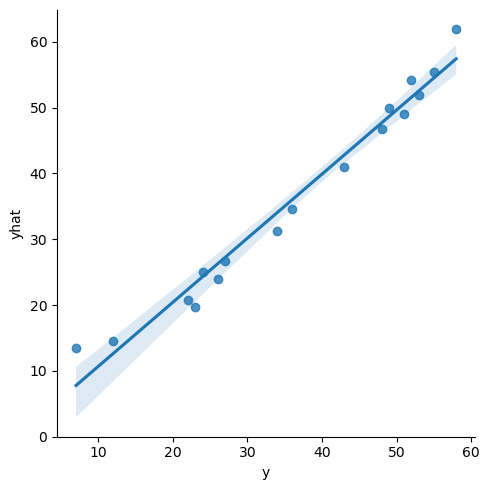

In [204]:
#Plot Y vs fitted values (yhat)
sns.lmplot(x='y',y='yhat', fit_reg=True, data=df)

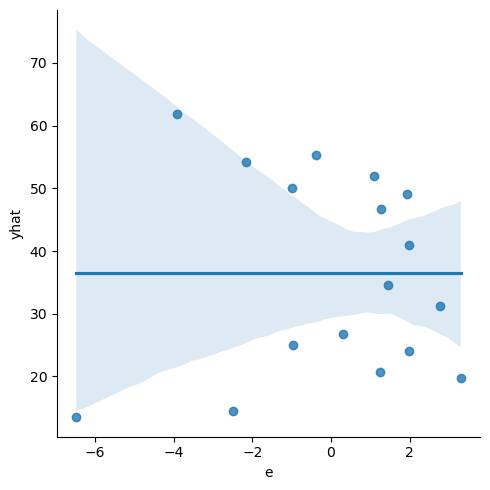

In [205]:
#Plot fitted values (yhat) vs residuals (e)
sns.lmplot(x='e',y='yhat', fit_reg=True, data=df)

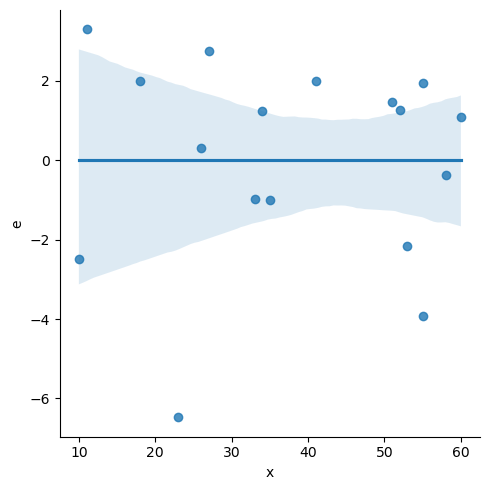

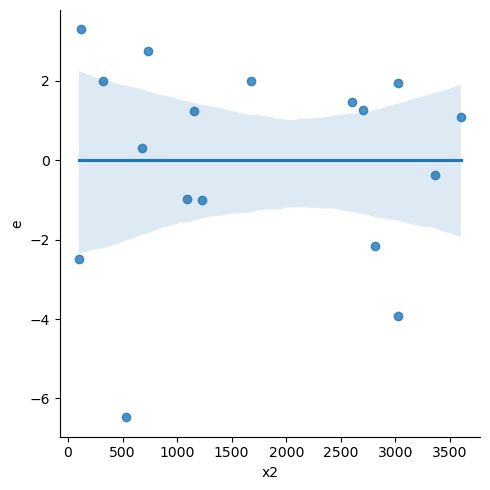

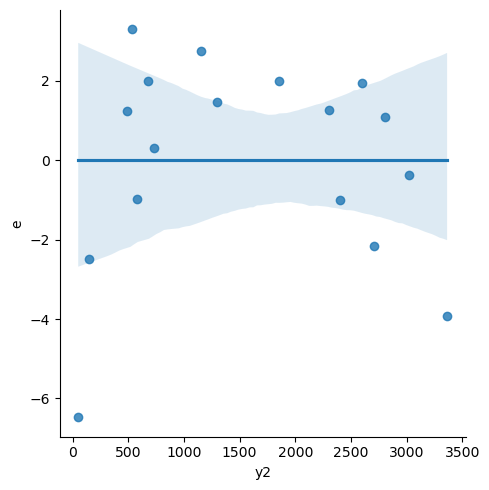

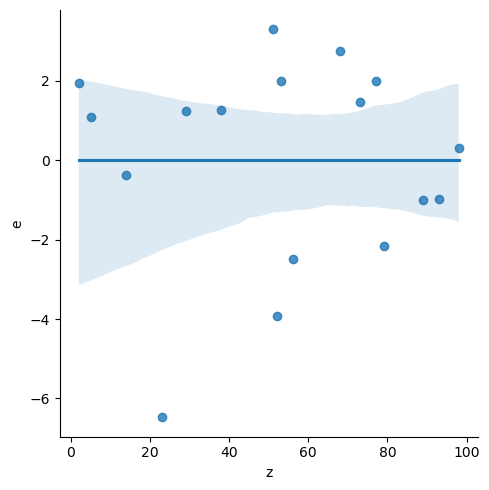

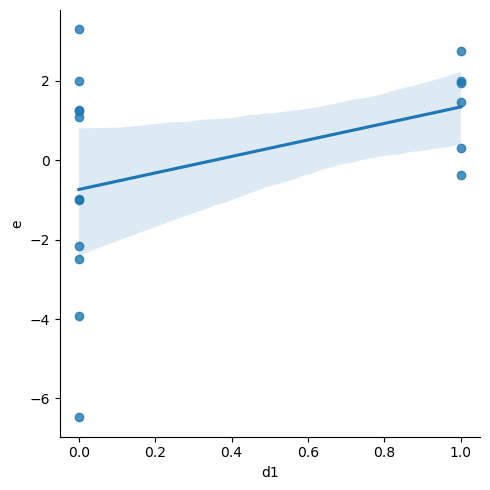

In [206]:
#Plot residuals against x values
x_vars =['x','x2','y2','z','d1']
for i in x_vars:
    sns.lmplot(x=i,y='e', fit_reg=True, data=df)    

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


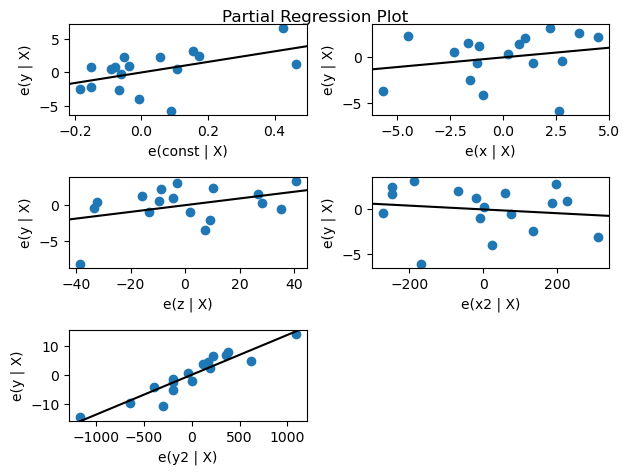

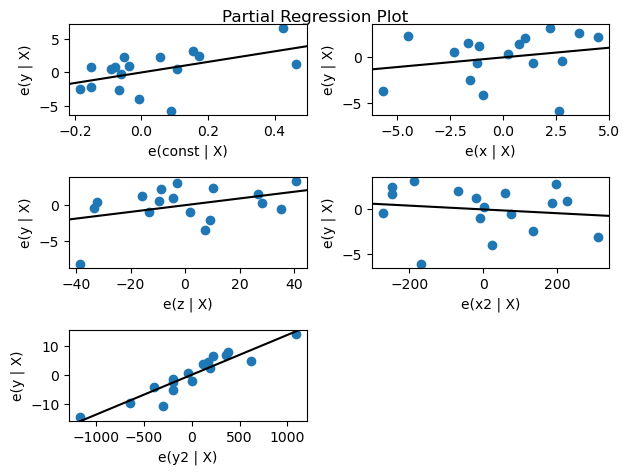

In [207]:
sm.graphics.plot_partregress_grid(results)


In [192]:
#Transforming Variables - Logs, Squares, and Inverses
df['log_x'] = np.log(df['x']) #Log(x)
df['x_squared'] = df['x'] * df['x'] #x^2
df['x_inverse'] = 1/df['x'] #1/x

In [193]:
#Transforming Variables - Interaction Terms
df['xINTERACTd1'] = df['x'] * df['d1'] #Categorical
df['xINTERACTz'] = df['x'] * df['z'] #Continuous

In [230]:
#Transforming Variables - Lagged X Variables
df['x_lag_1'] = df['x'].shift(1)  #1 Period Lag
df['x_lag_2'] = df['x'].shift(2)  #2 Period Lag 
df['x_lag_3'] = df['x'].shift(3)  #3 Period Lag 

#Lagged Y Variable
df['y_lag_1'] = df['y'].shift(1)  #1 Period Lag 
df['y_lag_2'] = df['y'].shift(2)  #2 Period Lag 
df['y_lag_3'] = df['y'].shift(3)  #3 Period Lag 


df.describe()

,x,y,z,y2,x2,d1,zx,x_lag_1,x_lag_2,x_lag_3,y_lag_1,y_lag_2,y_lag_3
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,19.000000,18.000000,17.000000,19.000000,18.000000,17.000000
mean,34.300000,32.950000,49.650000,1366.450000,1484.200000,0.300000,1565.150000,34.263158,33.222222,32.117647,32.105263,31.000000,30.000000
std,17.997368,17.190802,31.254936,1140.239147,1238.915213,0.470162,1316.665976,18.489763,18.444051,18.387776,17.230125,17.022476,16.992645
min,1.000000,7.000000,2.000000,49.000000,1.000000,0.000000,70.000000,1.000000,1.000000,1.000000,7.000000,7.000000,7.000000
25%,21.750000,22.000000,22.000000,484.000000,473.250000,0.000000,501.250000,21.500000,21.250000,21.000000,22.000000,22.000000,22.000000
50%,33.500000,30.500000,52.500000,942.500000,1122.500000,0.000000,1186.000000,33.000000,30.000000,27.000000,27.000000,26.500000,26.000000
75%,52.250000,49.500000,74.000000,2451.000000,2730.250000,1.000000,2626.000000,52.500000,51.750000,51.000000,49.500000,46.750000,43.000000
max,60.000000,58.000000,98.000000,3364.000000,3600.000000,1.000000,4187.000000,60.000000,60.000000,60.000000,58.000000,58.000000,58.000000


In [231]:
#Lagged variables create unequal columns
#Remove unequal columns / missing rows
df.dropna(inplace=True)
df.describe()

,x,y,z,y2,x2,d1,zx,x_lag_1,x_lag_2,x_lag_3,y_lag_1,y_lag_2,y_lag_3
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,37.764706,36.470588,52.941176,1570.352941,1691.647059,0.352941,1807.705882,36.941176,33.882353,32.117647,34.882353,32.235294,30.000000
std,16.794826,15.977006,30.556240,1114.609626,1228.392646,0.492592,1279.481768,17.275237,18.791229,18.387776,15.995634,16.694046,16.992645
min,10.000000,7.000000,2.000000,49.000000,100.000000,0.000000,110.000000,10.000000,1.000000,1.000000,7.000000,7.000000,7.000000
25%,26.000000,24.000000,29.000000,576.000000,676.000000,0.000000,561.000000,23.000000,21.000000,21.000000,23.000000,22.000000,22.000000
50%,35.000000,36.000000,53.000000,1296.000000,1225.000000,0.000000,1836.000000,34.000000,33.000000,27.000000,34.000000,27.000000,26.000000
75%,53.000000,51.000000,77.000000,2601.000000,2809.000000,1.000000,2860.000000,53.000000,52.000000,51.000000,51.000000,48.000000,43.000000
max,60.000000,58.000000,98.000000,3364.000000,3600.000000,1.000000,4187.000000,60.000000,60.000000,60.000000,58.000000,58.000000,58.000000


In [208]:
#line = results.params[0] + results.params[1]*df['x'] + results.params[2]*df['z']
#plt.scatter(df['y'],yhat)
#plt.plot(line,yhat, color='red')

In [20]:
#Correlation matrix
df.corr() 

/var/folders/h6/pqj3gx255vd5dc6kqnfr7k3r0000gn/T/ipykernel_53201/2095637688.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,x,y,z,y2,x2,d1,zx
x,1.000000,0.880904,-0.257953,0.878002,0.973388,0.181624,0.395226
y,0.880904,1.000000,-0.074677,0.979512,0.876107,0.203820,0.431893
z,-0.257953,-0.074677,1.000000,-0.147323,-0.301980,0.122133,0.713983
y2,0.878002,0.979512,-0.147323,1.000000,0.898801,0.126087,0.360370
x2,0.973388,0.876107,-0.301980,0.898801,1.000000,0.163888,0.297726
d1,0.181624,0.203820,0.122133,0.126087,0.163888,1.000000,0.087069
zx,0.395226,0.431893,0.713983,0.360370,0.297726,0.087069,1.000000


/var/folders/h6/pqj3gx255vd5dc6kqnfr7k3r0000gn/T/ipykernel_53201/4084474319.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


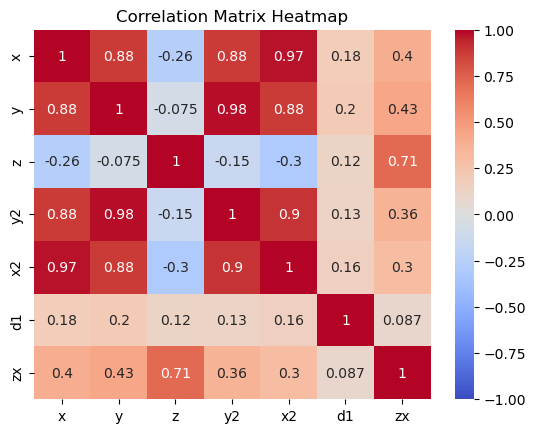

In [21]:
#Multicollinearity Check - Correlation Matrix of X in Heatmap Form!
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [24]:
#Multicollinearity test
print(X.values)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF) for Multicollinearity:")
print(vif)
#Interpretation:
#VIF values greater than 1 indicate the presence of multicollinearity.
#A commonly used threshold is VIF > 5 or VIF > 10 to identify problematic multicollinearity.
#Higher VIF values suggest stronger correlation among the predictor variables.
#Variables with high VIF may need further examination or potential remedial actions such as variable selection or transformation.

[[1.000e+00 2.200e+01 1.900e+01 4.840e+02 1.000e+02]
 [1.000e+00 1.000e+00 7.000e+01 1.000e+00 4.900e+01]
 [1.000e+00 2.100e+01 4.000e+00 4.410e+02 4.840e+02]
 [1.000e+00 2.300e+01 2.300e+01 5.290e+02 4.900e+01]
 [1.000e+00 1.000e+01 5.600e+01 1.000e+02 1.440e+02]
 [1.000e+00 1.100e+01 5.100e+01 1.210e+02 5.290e+02]
 [1.000e+00 3.300e+01 9.300e+01 1.089e+03 5.760e+02]
 [1.000e+00 3.400e+01 2.900e+01 1.156e+03 4.840e+02]
 [1.000e+00 2.700e+01 6.800e+01 7.290e+02 1.156e+03]
 [1.000e+00 1.800e+01 7.700e+01 3.240e+02 6.760e+02]
 [1.000e+00 2.600e+01 9.800e+01 6.760e+02 7.290e+02]
 [1.000e+00 5.800e+01 1.400e+01 3.364e+03 3.025e+03]
 [1.000e+00 5.100e+01 7.300e+01 2.601e+03 1.296e+03]
 [1.000e+00 5.500e+01 2.000e+00 3.025e+03 2.601e+03]
 [1.000e+00 6.000e+01 5.000e+00 3.600e+03 2.809e+03]
 [1.000e+00 5.500e+01 5.200e+01 3.025e+03 3.364e+03]
 [1.000e+00 4.100e+01 5.300e+01 1.681e+03 1.849e+03]
 [1.000e+00 5.200e+01 3.800e+01 2.704e+03 2.304e+03]
 [1.000e+00 5.300e+01 7.900e+01 2.809e+03 2.70

In [212]:
#Variables with VIF greater than 1, 5, and 10
vif_greater_than_1 = vif[vif['VIF'] > 1]['Variable'].tolist()
vif_greater_than_5 = vif[vif['VIF'] > 5]['Variable'].tolist()
vif_greater_than_10 = vif[vif['VIF'] > 10]['Variable'].tolist()

print("\nVariables with VIF > 1:", vif_greater_than_1)
print("Variables with VIF > 5:", vif_greater_than_5)
print("Variables with VIF > 10:", vif_greater_than_10)


Variables with VIF > 1: ['const', 'x', 'z', 'x2', 'y2']
Variables with VIF > 5: ['const', 'x', 'x2']
Variables with VIF > 10: ['const', 'x', 'x2']


-5.434763750145066e-13


(array([1., 0., 2., 0., 3., 3., 3., 3., 4., 1.]),
 array([-6.53559834, -5.43829887, -4.34099941, -3.24369994, -2.14640047,
        -1.049101  ,  0.04819847,  1.14549793,  2.2427974 ,  3.34009687,
         4.43739634]),
 <BarContainer object of 10 artists>)

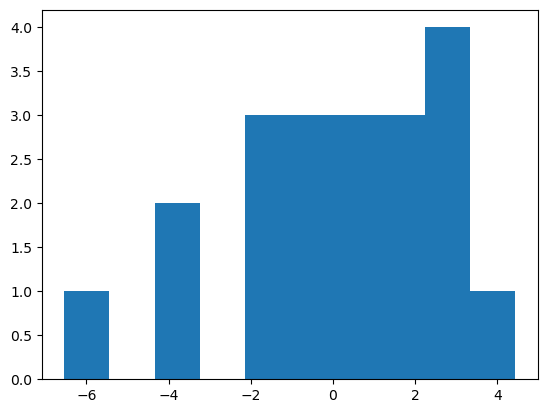

In [18]:
#Histogram to check for normally distributed residuals
e = results.resid
print(e.mean())
plt.hist(e)

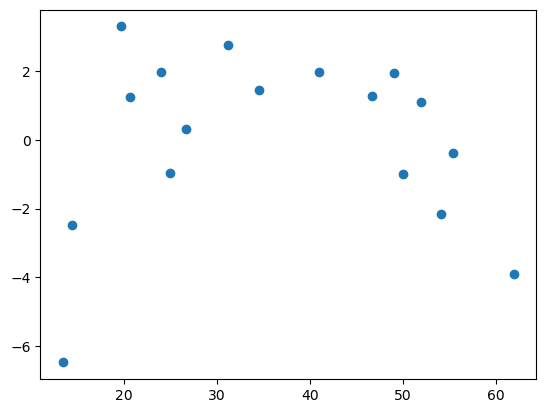

In [214]:
#Fitted values vs residuals to check for nonconstant error variance
plt.scatter(yhat, e)
plt.show()

In [27]:
df.head()

,x,y,z,cat,y2,x2,d1,zx
0,22,10,19,a,100,484,0,418
1,1,7,70,a,49,1,0,70
2,21,22,4,a,484,441,0,84
3,23,7,23,b,49,529,0,529
4,10,12,56,b,144,100,0,560


In [26]:
#Categorical interaction term
model = sm.OLS.from_formula('y ~ x + d1 + x:d1', df)
results = model.fit()
r = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     20.48
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.00e-05
Time:                        19:09:47   Log-Likelihood:                -68.983
No. Observations:                  20   AIC:                             146.0
Df Residuals:                      16   BIC:                             149.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5897      4.705      0.338      0.740      -8.384      11.564
x              0.9041      0.128      7.072      0.000       0.633       1.175
d1            12.0186     10.375      1.158      0.264      -9.975      34.012
x:d1          -0.2771      0.253     -1.093      0.290      -0.814       0.260
==============================================================================
Omnibus:                        0.166   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.920   Jarque-Bera (JB):                0.188
Skew:                          -0.167   Prob(JB):                        0.910
Kurtosis:                       2.663   Cond. No.                         232.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
#Continuous interaction term
model = sm.OLS.from_formula('y ~ x + z + z:x', df)
results = model.fit()
r = model.fit()
results.summary()

/Users/robertwrobel/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     16.13
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           0.000114
Time:                        15:20:00   Log-Likelihood:                -57.520
No. Observations:                  17   AIC:                             123.0
Df Residuals:                      13   BIC:                             126.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.6211     13.972     -1.261      0.229     -47.806      12.564
x              1.2349      0.284      4.354      0.001       0.622       1.848
z              0.3971      0.231      1.717      0.110      -0.103       0.897
z:x           -0.0075      0.005     -1.439      0.174      -0.019       0.004
==============================================================================
Omnibus:                        0.819   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.664   Jarque-Bera (JB):                0.701
Skew:                          -0.154   Prob(JB):                        0.704
Kurtosis:                       2.054   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [224]:
predictions = pd.DataFrame({'x': [1, 1, 1, 1, 1],
                            'z': [1, 1, 0, 0, 1],
                            'x2':[100,200,300,400,500],
                            'y2':[20,20,20,20,20]})

predictions['yhat'] = results.predict(predictions)
print(predictions)

   x  z   x2  y2       yhat
0  1  1  100  20 -15.996620
1  1  1  200  20 -15.996620
2  1  0  300  20 -16.386195
3  1  0  400  20 -16.386195
4  1  1  500  20 -15.996620


Intercept   -17.621054
x             1.234859
z             0.397078
z:x          -0.007504
dtype: float64
Intercept   -17.621054
x             1.234859
z             0.397078
z:x          -0.007504
dtype: float64


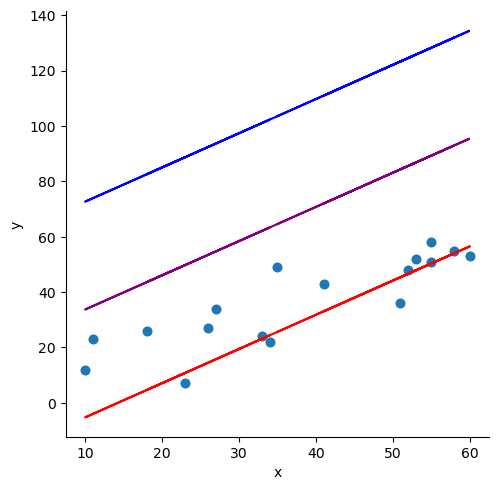

In [225]:
sns.lmplot(x='x',y='y', fit_reg=False, data=df)
r = results
print(results.params)
print(r.params)
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], r.params[0] + r.params[1]*df['x'] + r.params[2] * 0 + r.params[3] * 0, color='red')
plt.plot(df['x'], r.params[0] + r.params[1]*df['x'] + r.params[2] * 100 + r.params[3] * 100, color='purple')
plt.plot(df['x'], r.params[0] + r.params[1]*df['x'] + r.params[2] * 200 + r.params[3] * 200, color='blue')


In [28]:
#Comparing Models with F-Tests
#More complex model is model 2.  F-Test checks to see if coefficients for extra variables are zero-ish
model1 = sm.OLS.from_formula('y ~ x + z', df).fit()
model2 = sm.OLS.from_formula('y ~ x + z + x2 + y2', df).fit()
from statsmodels.stats.anova import anova_lm

anova_result = anova_lm(model1, model2)

p_values = anova_result.iloc[:, -1][1]
print(p_values)

#print(p_values)
#Since P-Value is below cutoff, 0.05 for our purposes, we reject the null hypothesis that the extra variables have zero predictive power

2.0231163532059095e-07


In [ ]:
#Createing an F-Test function
def f_tester(model1,model2,p_cutoff):
    anova_results = anova_lm(model1, model2)
    p_value = anova_result.iloc[:, -1][1]
    if p_value < p_cutoff:
        print(f'Your test statistic p-value is {p_value}, \nwhich is less than the cutoff value of {p_cutoff}, so reject \nthe null that the extra variables have no predictive value.')
    else:
        print(f'Your test statistic p-value is {p_value}, which is greater than the cutoff value of {p_cutoff}, so do not reject the null that the extra variables have no predictive value.')
    print(f'\n Reject the Null: {p_value < p_cutoff}')
f_tester(model1,model2,0.05)

In [30]:
#Comparing models with other measures

models = ['model1','model2']
r_squared = [model1.rsquared, model2.rsquared] #Larger = better
adj_r_squared = [model1.rsquared_adj, model2.rsquared_adj] #Larger = better
aic = [model1.aic, model2.aic] #Smaller = better
bic = [model1.bic, model2.bic] #Smaller = better

data = {
    'Model': models,
    'R-squared': r_squared,
    'Adjusted R-squared': adj_r_squared,
    'AIC': aic,
    'BIC': bic
}
df_stats = pd.DataFrame(data)

print(df_stats)

    Model  R-squared  Adjusted R-squared         AIC         BIC
0  model1   0.800923            0.777502  143.225359  146.212556
1  model2   0.974503            0.967704  106.122809  111.101470


In [31]:
for_model1 = 0
for_model2 = 0

# Comparison for R-squared
if r_squared[0] > r_squared[1]:
    print("Model 1 has a higher R-squared.")
    for_model1 += 1
elif r_squared[1] > r_squared[0]:
    print("Model 2 has a higher R-squared.")
    for_model2 += 1

else:
    print("R-squared values are equal for both models.")

# Comparison for adjusted R-squared
if adj_r_squared[0] > adj_r_squared[1]:
    print("Model 1 has a higher adjusted R-squared.")
    for_model1 += 1
elif adj_r_squared[1] > adj_r_squared[0]:
    print("Model 2 has a higher adjusted R-squared.")
    for_model2 += 1
else:
    print("Adjusted R-squared values are equal for both models.")

# Comparison for AIC
if aic[0] < aic[1]:
    print("Model 1 has a lower AIC.")
    for_model1 += 1
elif aic[1] < aic[0]:
    print("Model 2 has a lower AIC.")
    for_model2 += 1

else:
    print("AIC values are equal for both models.")

# Comparison for BIC
if bic[0] < bic[1]:
    print("Model 1 has a lower BIC.")
    for_model1 += 1
elif bic[1] < bic[0]:
    print("Model 2 has a lower BIC.")
    for_model2 += 1

else:
    print("BIC values are equal for both models.")
    
if for_model1 > for_model2:
    print('Based on all for selection criteria, Model1 is a better fit')
elif for_model1 < for_model2:
    print('Based on all for selection criteria, Model2 is a better fit')
else:
    print('Based on all for selection criteria, Model1 and Model2 fit the data equally well')



Model 2 has a higher R-squared.
Model 2 has a higher adjusted R-squared.
Model 2 has a lower AIC.
Model 2 has a lower BIC.
Based on all for selection criteria, Model2 is a better fit


In [ ]:
#Stepwise Variable Selection - Forward
from itertools import combinations


#Define the feature matrix X and target variable y
X = data[['x', 'z', 'x2','y2']]  # Replace with the appropriate column names
y = data['y']  # Replace with the appropriate column name

#Perform forward stepwise variable selection
def forward_stepwise_selection(X, y, max_features=None):
    selected_features = []
    remaining_features = set(X.columns)
    
    if max_features is None:
        max_features = len(X.columns)
    
    while len(remaining_features) > 0 and len(selected_features) < max_features:
        best_pvalue = float('inf')
        best_feature = None
        
        for feature in remaining_features:
            if X[feature].dtype == 'object':
                continue
            
            model_formula = f"{feature} ~ {' + '.join(selected_features + [feature])}"
            model = sm.OLS.from_formula(model_formula, data=X.join(y)).fit()
            pvalue = model.pvalues[feature]
            
            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = feature
        
        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    print(selected_features)
    



In [ ]:
forward_stepwise_selection(X, y, 2)

In [ ]:
#Incomplete
'''
sm.graphics.plot_partregress(
                             endog='y', # response
                             exog_i='x', # variable of interest
                             exog_others=['z','y2'], # other predictors
                             data=df,  # dataframe
                             obs_labels=True # show labels
                             );
'''

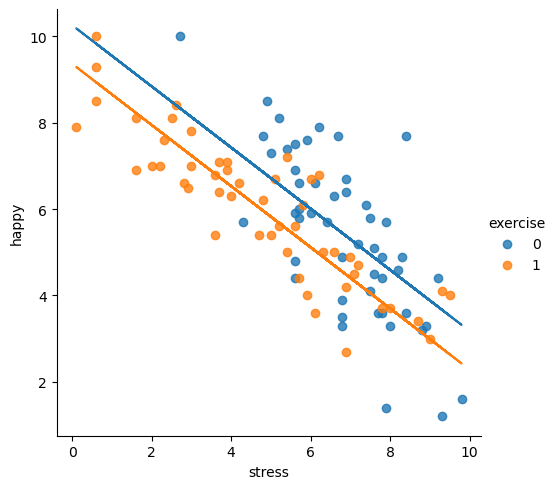

In [136]:
data = pd.read_csv('mood.csv')
#Categorical variable
model = sm.OLS.from_formula('happy ~ stress + exercise', data=data).fit()

stress = data.stress
exercise = data.exercise

b0 = model.params[0]
b1 = model.params[1]
b2 = model.params[2]

happy_wo_ex = b0 + (b1 * stress) + (b2 * 0)
happy_wi_ex = b0 + (b1 * stress) + (b2 * 1) 

sns.lmplot(x='stress', y='happy', hue='exercise', fit_reg=False, data=data)
plt.plot(stress, happy_wo_ex)
plt.plot(stress, happy_wi_ex)

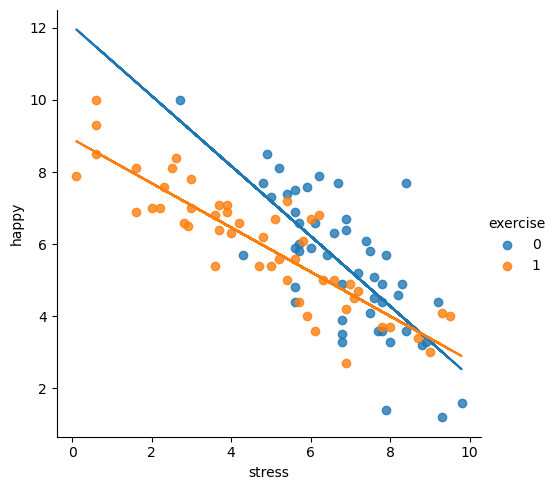

In [138]:
#Categorical interaction term
model = sm.OLS.from_formula('happy ~ stress + exercise + stress:exercise', data=data).fit()
stress = data.stress
exercise = data.exercise

b0 = model.params[0] #intercept
b1 = model.params[1] #stress
b2 = model.params[2] #exercise
b3 = model.params[3] #stress * exercise (interaction)

happy_wo_ex = b0 + (b1 * stress) + (b2 * 0)
happy_w_ex = b0 + (b1 * stress) + (b2 * 1) + (b3 * stress * 1)

sns.lmplot(x='stress', y='happy', hue='exercise', fit_reg=False, data=data)
plt.plot(stress, happy_wo_ex)
plt.plot(stress, happy_w_ex)

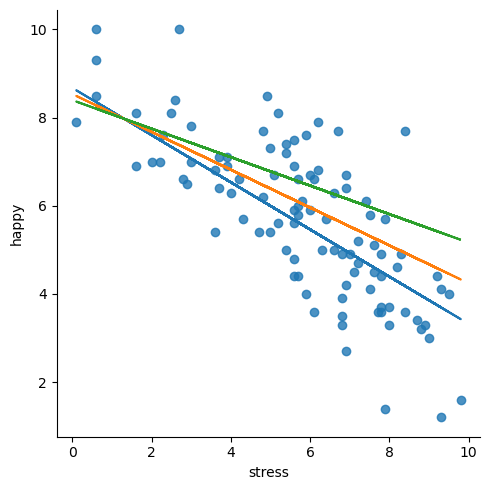

In [141]:
#Continuous interaction term
model = sm.OLS.from_formula('happy ~ stress + sleep + stress:sleep', data=data).fit()
stress = data.stress
exercise = data.exercise
sleep = data.sleep

b0 = model.params[0]
b1 = model.params[1]
b2 = model.params[2]
b3 = model.params[3]

happy_sleep6 = b0 + (b1 * stress) + (b2 * 6) + (b3 * stress * 6)
happy_sleep9 = b0 + (b1 * stress) + (b2 * 9) + (b3 * stress * 9)
happy_sleep12 = b0 + (b1 * stress) + (b2 * 12) + (b3 * stress * 12)

sns.lmplot(x='stress', y='happy', fit_reg=False, data=data)
plt.plot(stress, happy_sleep6)
plt.plot(stress, happy_sleep9)
plt.plot(stress, happy_sleep12)

Critical Cooks distance: 0.2
Int64Index([], dtype='int64') 
 []


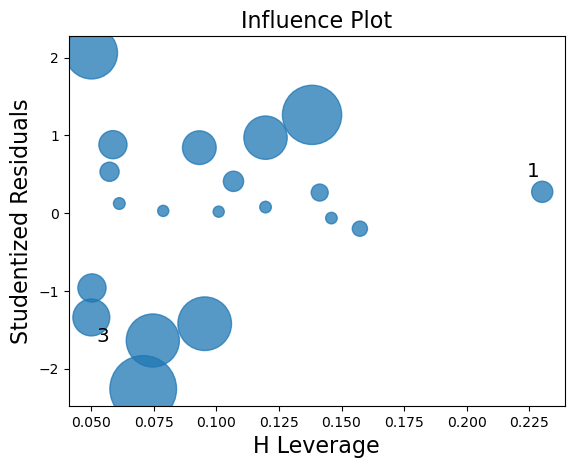

In [37]:
#Outiler detection using 'Cook's distance'
sm.graphics.influence_plot(results, criterion="cooks")

#Obtain Cook's distance 
cooksd = results.get_influence().cooks_distance[0]


#Calculate critical d
critical_d = 4 / len(df)
print('Critical Cooks distance:', critical_d)

#Identify potential outliers with leverage
out_d = cooksd > critical_d

#Output potential outliers with leverage
print(df.index[out_d], "\n", cooksd[out_d])

In [ ]:
from statsmodels.stats.diagnostic import linear_reset
#Perform the Ramsey Reset test
#reset_result = linear_reset(results)
#print(reset_result)
#Print the test statistics and p-value
#print("Ramsey Reset test f-value:", reset_result.statistic)
#print("Ramsey Reset test p-value:", reset_result.pvalue)

def reset_test(model,p):
    results = model
    reset_result = linear_reset(results)
    if reset_result.pvalue < p:
        print(f'The RESET test p-value is {reset_result.pvalue} which is less than the critical value of {p}.')
        print('Reject the null that the model is correctly specified and consider non-linear relationships.')
    else:
        print(f'The RESET test p-value is {reset_result.pvalue} which is greater than the critical value of {p}.')
        print('Do not reject the null that the model is correclt specified.')

reset_test(model1,0.05)

In [32]:
model = sm.OLS.from_formula('y ~ x', df)
results = model.fit()
results.summary()

#Outlier Detection
#Calculate the studentized residuals
#studentized_residuals = results.get_influence().resid_studentized_internal
#print(studentized_residuals)
#Define a threshold for outlier detection
thresholds = [1, 2, 3]  # Adjust the threshold as desired

for i in thresholds:
    studentized_residuals = results.get_influence().resid_studentized_internal
    outliers = abs(studentized_residuals) > i
    outlier_indices = data[outliers].index
    print(f"\nOutlier indices for residuals greater than {i} standard deviations:")
    print(outlier_indices)






TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
#QQ Plot for normality of residuals
model = sm.OLS.from_formula('y ~ x', df)
results = model.fit()

sm.qqplot(results.resid, line='s', dist=stats.norm)
plt.title("QQ Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

In [40]:
#Comparing Models with Cross Validation
data = pd.read_csv('simple_regression.csv')  # Replace 'your_data.csv' with the actual file path

#Define the feature matrix X and target variable y
X = data[['x', 'z', 'x2']]  # Replace with the appropriate column names
y = data['y']  # Replace with the appropriate column name

#Define the models to compare and store in a tuple of name / type pairs
models = [
    ('Model 1', sm.OLS.from_formula('y ~ x + z', data)),  
    ('Model 2', sm.OLS.from_formula('y ~ x + z + x2', data))] 

#Perform cross-validation and compare models
k = 5
n = len(X)
fold_size = n // k

for model_name, model_type in models:
    rmse_scores = []

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size

        #Split the data into training and testing sets
        X_train = pd.concat([X[:start], X[end:]])
        y_train = pd.concat([y[:start], y[end:]])
        X_test = X[start:end]
        y_test = y[start:end]

        #Create the model
        model = model_type

        #Fit the model to the training data
        results = model.fit()

        #Predict using the testing set
        y_pred = results.predict(X_test)

        #Calculate the root mean squared error
        rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
        rmse_scores.append(rmse)

    #Calculate the average root mean squared error across all folds for the current model
    average_rmse = np.mean(rmse_scores)

    #Print the model name and average RMSE
    print(f"{model_name}: Average RMSE = {average_rmse:.2f}")

FileNotFoundError: [Errno 2] No such file or directory: 'simple_regression.csv'

In [39]:
#Jarque-Bera test for normality of residuals:

def jb(significance_level):
    jb_test = jarque_bera(results.resid)
    #print("Jarque-Bera Test for Normality of Residuals:")
    if jb_test[1] > significance_level:
        print(f'\nThe P-Value is {jb_test[1]} which is greater than the significance level of {significance_level}.')
        print("\nDo not reject the null hypothesis that the residuals are normally distributed.")
    else:
        print(f'\nThe P-Value is {jb_test[1]} which is greater than the significance level of {significance_level}.')
        print("\nReject the null hypothesis that the residuals are normally distributed.")

jb(0.05)




The P-Value is 0.7464643272798106 which is greater than the significance level of 0.05.

Do not reject the null hypothesis that the residuals are normally distributed.


In [19]:
#Heteroskedasticity tests
white_test = het_white(results.resid, X)
bp_test = het_breuschpagan(results.resid, X)
print("Heteroskedasticity Tests:")
print("White's Test:")
print("LM Statistic:", white_test[0])
print("LM P-value:", white_test[1])
print("F-Statistic:", white_test[2])
print("F P-value:", white_test[3])
print("Breusch Pagan Test:")
print(bp_test)

#Interpretation:
#If the p-value of White's test is above the significance level (e.g., 0.05), we fail to reject the null hypothesis of homoskedasticity.
#If the p-value of Breusch-Pagan test is above the significance level (e.g., 0.05), we fail to reject the null hypothesis of homoskedasticity.

Heteroskedasticity Tests:
White's Test:
LM Statistic: 10.719750054291431
LM P-value: 0.6342820248867088
F-Statistic: 0.5331297084754052
F P-value: 0.8391898637591536
Breusch Pagan Test:
(4.243739896779488, 0.3740230757256759, 1.0100128145047773, 0.4332199627526787)
